In [23]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import rc
from scipy import optimize
from scipy.optimize import curve_fit
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

[-3.58989826e+01  2.70648930e-04  1.26141415e-02  2.74217577e+01
  9.57461432e+01] [8.03375444e-01 3.93696954e-05 3.32296175e-05 1.87383248e-02
 2.49726944e-01]
[ 7.15359000e+01  2.60664929e-04  1.27454534e-02 -4.98627505e+02
  1.51020450e+02] [1.64248772e+00 1.19403070e-05 1.16072407e-05 2.18847895e-02
 1.84788439e-01]


<Figure size 864x504 with 0 Axes>

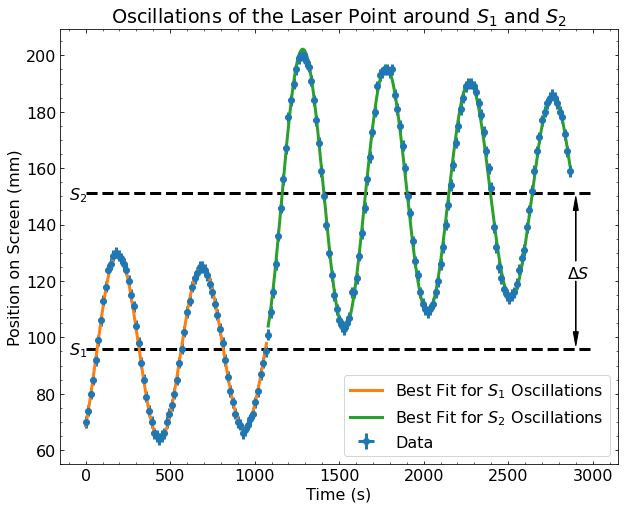

In [90]:
data = np.genfromtxt('/Users/chris/Desktop/128AL_Cavendish.csv',delimiter=',')
t = data[2:,0]
terr = data[2:,1]
s = data[2:,2]
# fix broken spreadsheet entry
s[54]=98
serr = data[2:,3]
#plot data
plt.figure(figsize=(12,7))
plt.figure(figsize=(10,8))
plt.errorbar(t,s,xerr=terr,yerr=serr,linestyle='',marker='o',label = 'Data')

#make best fit curves
def curve(t,A,gam,w,phi,h):
    return A*(np.exp(-gam*t))*np.sin(w*t+phi)+h

#first half
bestguess_A = [-35,0.00027,0.013,27,96]
bestpar_A, covariance_A = optimize.curve_fit(curve,t[0:72],s[0:72],bestguess_A,sigma=serr[0:72],absolute_sigma='True')
bestpar_unc_A = np.sqrt(np.diag(covariance_A))
#second half
bestguess_B = [70,0.00026,0.0127,-499,151]
bestpar_B, covariance_B = optimize.curve_fit(curve,t[72:],s[72:],bestguess_B,sigma=serr[72:],absolute_sigma='True')
bestpar_unc_B = np.sqrt(np.diag(covariance_B))

# define S1 and S2
S1 = bestpar_A[4]
S1_err = bestpar_unc_A[4]
S2 = bestpar_B[4]
S2_err = bestpar_unc_B[4]

#plot best fit curves
x1 = np.linspace(0,1070,10000)
y1 = curve(x1,bestpar_A[0],bestpar_A[1],bestpar_A[2],bestpar_A[3],bestpar_A[4])
x2 = np.linspace(t[72],t[-1],10000)
y2 = curve(x2,bestpar_B[0],bestpar_B[1],bestpar_B[2],bestpar_B[3],bestpar_B[4])

# plot black lines
S1Line = np.full(7,S1)
S2Line = np.full(7,S2)
magicX = [0,500,1000,1500,2000,2500,3000]
plt.plot(magicX,S1Line,'--',color='black')
plt.plot(magicX,S2Line,'--',color='black')
plt.arrow(2900,127,0,18,head_width=30,head_length=5,color='black')
plt.arrow(2900,120,0,-18,head_width=30,head_length=5,color='black')
plt.text(2850,121,'$\Delta S$')
plt.text(-100,149,'$S_2$')
plt.text(-100,94,'$S_1$')

plt.plot(x1,y1,label = r"Best Fit for $S_1$ Oscillations")
plt.plot(x2,y2,label = "Best Fit for $S_2$ Oscillations")
plt.xlabel("Time (s)")
plt.ylabel("Position on Screen (mm)")
plt.title(r"Oscillations of the Laser Point around $S_1$ and $S_2$")
plt.legend()
print(bestpar_A,bestpar_unc_A)
print(bestpar_B,bestpar_unc_B)
plt.savefig('/Users/chris/Desktop/plots.jpg',dpi=500)

In [84]:
# define measured parameters
T1 = 2*np.pi/bestpar_A[2]
T1_err = 2*np.pi/(bestpar_A[2]**2)*bestpar_unc_A[2]
print(T1,T1_err)
T2 = 2*np.pi/bestpar_B[2]
T2_err = 2*np.pi/(bestpar_B[2]**2)*bestpar_unc_B[2]
print(T2,T2_err)
T = (T1 + T2)/2
T_err = np.sqrt(T1_err**2 + T2_err**2)/2
dT = T_err
print("The average period is " + str(T) + " +/ " + str(T_err)+ " s.")

S1 = bestpar_A[4]
S1_err = bestpar_unc_A[4]
S2 = bestpar_B[4]
S2_err = bestpar_unc_B[4]
S = (S2-S1)*1e-3
S_err = np.sqrt(S1_err**2 + S2_err**2)*1e-3
dS = S_err
print("The displacement is " + str(S) + " +/- " + str(S_err) + " m.")

# other parameters (in m and kg)
b = 42.2e-3
db = 0.05e-3
d = 50e-3
dd = 0.5e-3
r = 9.55e-3
dr = .005e-3
L = 1.89
dL = 0.01
m = 1.5 #kg
dm = 0.01
G = np.pi**2*S*b**2*(d**2+2/5*r**2)/(T**2*m*L*d)
print(G)


498.1064563527602 1.3121691286498025
492.97463916618995 0.44895031068823915
The average period is 495.5405477594751 +/ 0.6934234282977192 s.
The displacement is 0.055274306515451475 +/- 0.0003106610914290302 m.
7.07942691520965e-11


In [85]:
# partial derivatives
d_S = G/S
d_b = 2*G/b
d_r = np.pi**2*S*b**2*(4/5*r)/(T**2*m*L*d)
d_T = -2*G/T
d_m = -G/m
d_L = -G/L
d_d = np.pi**2*S*b**2*((T**2*m*L*d*(2*d)-(d**2+2/5*r**2)*(T**2*m*L))/(T**2*m*L*d)**2)

dG = np.sqrt((dS*d_S)**2+(db*d_b)**2+(dr*d_r)**2+(dT*d_T)**2+(dm*d_m)**2+(dL*d_L)**2+(dd*d_d)**2)
print(str(G)+" +/- " + str(dG))

7.07942691520965e-11 +/- 1.0303066765681862e-12
9.432996060172938e-05


In [86]:
# correction for syst error
beta = b**3/(b**2+4*d**2)**(3/2)
dbeta_b = ((b**2+4*d**2)*3*b**2-(b**3*3/2*(b**2+4*d**2)*2*b))/(b**2+4*d**2)**3
dbeta_d = -(3/2)*(b**3*8*d)/((b**2+(4*d**2))**(5/2))

dbeta = ((dbeta_b*db)**2+(dbeta_d*dd)**2)**(1/2)
print(str(beta)+" +/- " + str(dbeta))

G0 = G/(1-beta)
dG0_dG = 1/(1-beta)
dG0_dbeta = G/(1-beta)**2


dG0 = np.sqrt((dG*dG0_dG)**2+(dbeta*dG0_dbeta)**2)
print(str(G0)+" +/- " + str(dG0))

0.058772337831158816 +/- 0.0024354128032405852
7.521481996073884e-11 +/- 1.1118072941942844e-12


In [88]:
# discussion
G_accepted = 6.67e-11
zscore = (G_accepted - G0)/(dG0)
per_err = (G0-G_accepted)/G_accepted*100
print(per_err)
print(zscore)

12.765847017599455
-7.658539393654043


[ 2.79426795e-07 -3.22331798e-01]
7.3922432488042326e-09
4.3881341557335105e-12
7.521481996073884e-11


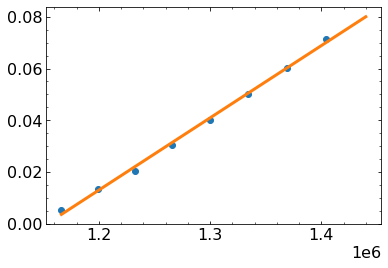

In [49]:
# Calculate G using acceleration approach
t_acc = t[72:80]
S_acc = (s[72:80] - S1)*1e-3
S_acc_err = np.sqrt(serr[72:80]**2+S1_err**2)
plt.plot(t_acc**2,S_acc,linestyle='',marker='o')
def line(x,m,b):
    return m*x+b
bestpar_C, covariance_C = optimize.curve_fit(line,t_acc**2,S_acc,sigma=S_acc_err,absolute_sigma='True')
bestpar_unc_C = np.sqrt(np.diag(covariance_C))
print(bestpar_C)
t_acc_array = np.linspace(t[72],t[80],1000)
plt.plot(t_acc_array**2,line(t_acc_array**2,bestpar_C[0],bestpar_C[1]))
a0 = bestpar_C[0]*d/L
print(a0)
G_acc = b**2*a0/(2*m)
print(G_acc)
print(G0)